<a href="https://colab.research.google.com/github/aljunalei/personality-type-predictor/blob/main/Personality_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Personality Type Prediction**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## **Load and explore the dataset**

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [ ]:
data.isnull().sum

<bound method DataFrame.sum of          Age  Gender  Education  Introversion Score  Sensing Score  \
0      False   False      False               False          False   
1      False   False      False               False          False   
2      False   False      False               False          False   
3      False   False      False               False          False   
4      False   False      False               False          False   
...      ...     ...        ...                 ...            ...   
43739  False   False      False               False          False   
43740  False   False      False               False          False   
43741  False   False      False               False          False   
43742  False   False      False               False          False   
43743  False   False      False               False          False   

       Thinking Score  Judging Score  Interest  Personality  
0               False          False     False        False  
1               False          False     False        False  
2               False          False     False        False  
3               False          False     False        False  
4               False          False     False        False  
...               ...            ...       ...          ...  
43739           False          False     False        False  
43740           False          False     False        False  
43741           False          False     False        False  
43742           False          False     False        False  
43743           False          False     False        False  

[43744 rows x 9 columns]>

In [ ]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000
mean,27.437203,0.229014,4.588349,5.780074,5.419131,5.391041
std,4.893805,0.420203,2.902628,1.241648,2.900785,1.442413
min,18.000000,0.000000,0.000150,0.000000,0.000320,0.000000
25%,24.000000,0.000000,2.067020,4.953340,2.895750,4.511842
50%,27.000000,0.000000,4.261680,6.162928,5.769870,5.771635
75%,30.000000,0.000000,7.085002,6.622978,7.923503,6.409583
max,52.000000,1.000000,9.999920,9.803837,9.999770,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


## **Mapping Categorical Data to Numerical Values**

- **`Interest` Column:** Converts categories into numbers:  
  - 'Arts' → `1`, 'Sports' → `2`, 'Technology' → `3`, 'Others' → `4`, 'Unknown' → `5`
  
- **`Gender` Column:** Converts gender into numerical values:  
  - 'Female' → `0`, 'Male' → `1`

- **`data.head()`**: Displays the first few rows to verify changes.


In [ ]:
data['Interest'] = data['Interest'].map({'Arts':1, 'Sports':2, 'Technology':3, 'Others':4, 'Unknown':5})
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,0,1,5.89208,2.144395,7.32363,5.462224,1,ENTP
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,5,INTP
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,4,ESFP
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,2,ENFJ
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,4,ISFP


## **Correlation Matrix and Heatmap**

- **`corr`**: Computes the correlation between all numerical columns in the dataset.  
- **`sns.heatmap(corr)`**: Visualizes the correlation matrix using a heatmap to identify relationships between variables.


In [ ]:
corr = data.select_dtypes(include='number').corr()
corr

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
Age,1.000000,0.003122,0.002236,-0.008814,0.166563,-0.001742,0.005590,0.005147
Gender,0.003122,1.000000,0.006691,-0.004294,0.000808,-0.000238,-0.001030,0.004940
Education,0.002236,0.006691,1.000000,0.000930,-0.004769,0.003562,-0.307034,0.024829
Introversion Score,-0.008814,-0.004294,0.000930,1.000000,-0.000116,-0.008502,0.004279,-0.001990
Sensing Score,0.166563,0.000808,-0.004769,-0.000116,1.000000,0.010325,0.002179,0.005188
Thinking Score,-0.001742,-0.000238,0.003562,-0.008502,0.010325,1.000000,0.001714,0.007392
Judging Score,0.005590,-0.001030,-0.307034,0.004279,0.002179,0.001714,1.000000,-0.000543
Interest,0.005147,0.004940,0.024829,-0.001990,0.005188,0.007392,-0.000543,1.000000


<Axes: >

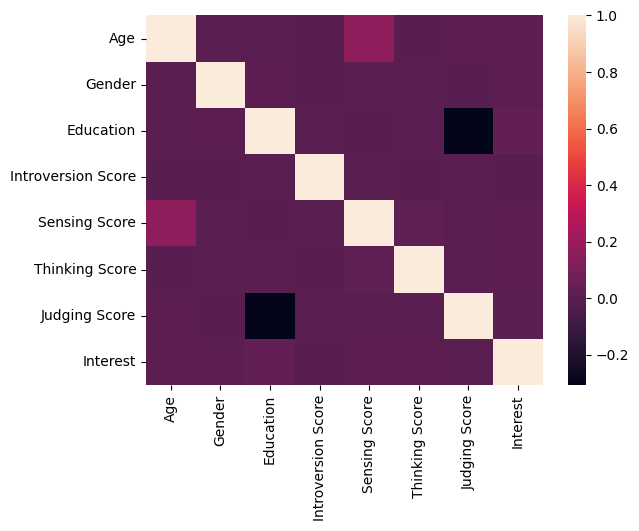

In [ ]:
sns.heatmap(corr)

## **Splitting Data for Training and Testing**

- **`X`**: Features (all columns except 'Personality').  
- **`y`**: Target variable ('Personality').  
- **`train_test_split`**: Splits the dataset into training (80%) and testing (20%) sets.  
  - `random_state=42` ensures reproducibility.  
  - `stratify=y` maintains class distribution in training and testing sets.  


In [ ]:
X = data.drop(columns='Personality')
y = data['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Feature Scaling with StandardScaler**

- **`StandardScaler()`**: Standardizes features by removing the mean and scaling to unit variance.  
- **`fit_transform(X_train)`**: Computes the scaling parameters from `X_train` and applies the transformation.  
- **`transform(X_test)`**: Applies the same scaling parameters to `X_test` to maintain consistency.  


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Training Logistic Regression Model**

- **`LogisticRegression(solver='saga', max_iter=2000)`**:  
  - Uses the 'saga' solver (efficient for large datasets).  
  - Sets `max_iter=2000` to allow more iterations for convergence.  
- **`model.fit(X_train, y_train)`**: Trains the model using the training data.  


In [ ]:
model = LogisticRegression(solver='saga', max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='saga')

## **Making Predictions**

- **`model.predict(X_test)`**: Uses the trained model to predict the target variable (`y_pred`) for the test set.  


In [ ]:
y_pred = model.predict(X_test)

## **Evaluating Model Performance**

- **`accuracy_score(y_test, y_pred)`**: Computes the model's accuracy as a percentage.  
- **`classification_report(y_test, y_pred)`**: Displays precision, recall, and F1-score for each class.  

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.65%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.83      0.76      0.79       546
        ENFP       0.84      0.77      0.80       546
        ENTJ       0.79      0.79      0.79       547
        ENTP       0.79      0.77      0.78       547
        ESFJ       0.75      0.83      0.79       547
        ESFP       0.85      0.82      0.83       546
        ESTJ       0.77      0.81      0.79       547
        ESTP       0.81      0.80      0.80       547
        INFJ       0.81      0.78      0.79       547
        INFP       0.84      0.75      0.79       547
        INTJ       0.83      0.77      0.80       547
        INTP       0.80      0.77      0.78       547
        ISFJ       0.75      0.84      0.79       547
        ISFP       0.79      0.85      0.82       547
        ISTJ       0.76      0.84      0.80       547
        ISTP       0.79      0.79      0.79       547

    accuracy                           0.80      8749
   macro avg       0.80   

## **Confusion Matrix Visualization**

- **`confusion_matrix(y_test, y_pred)`**: Computes the confusion matrix to evaluate model performance.  
- **`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')`**: Displays the matrix as a heatmap with numerical values.  
- **`xticklabels` & `yticklabels`**: Labels the axes using sorted class names.  
- **Plot labels and title**: Helps interpret actual vs. predicted values.  


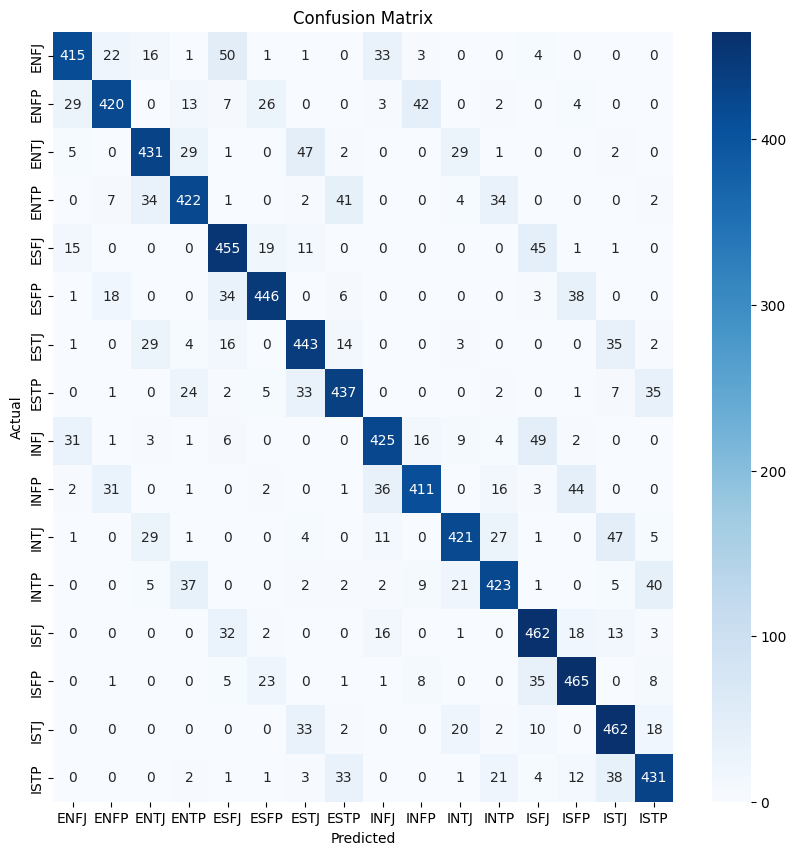

In [ ]:
target_names = np.sort(y_test.unique())

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Multinomial Logistic Regression with Statsmodels**

- **`sm.add_constant(X_train)`**: Adds an intercept term to the feature set.  
- **`sm.MNLogit(y_train.astype('category').cat.codes, X_train_sm).fit()`**:  
  - Fits a **Multinomial Logistic Regression** model using Statsmodels.  
  - Converts `y_train` to categorical codes for compatibility.  
- **`sm_model.summary()`**: Displays model coefficients, p-values, and statistical significance.  

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
sm_model = sm.MNLogit(y_train.astype('category').cat.codes, X_train_sm).fit()

print(sm_model.summary())

Optimization terminated successfully.
         Current function value: 0.532570
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                34995
Model:                        MNLogit   Df Residuals:                    34860
Method:                           MLE   Df Model:                          120
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.8079
Time:                        13:13:47   Log-Likelihood:                -18637.
converged:                       True   LL-Null:                       -97027.
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4577      0.284     12.180      0.000       2.901       4.014
x1             0.0312      0

## **Predicting a New Sample**

- **`new_sample`**: A NumPy array representing a single data point.  
- **`scaler.transform(new_sample)`**: Scales the sample using the trained `StandardScaler`.  
- **`model.predict(new_sample)`**: Predicts the class for the new data point.  
- **`print(prediction[0])`**: Displays the predicted class.  


In [ ]:
new_sample = np.array([[21, 1, 0, 4, 5, 6, 3, 3]])
new_sample = scaler.transform(new_sample)
prediction = model.predict(new_sample)

print('Predicted class:', prediction[0])

Predicted class: INFP


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Tuning the Logistic Regression Model**

- **`multi_class='multinomial'`**: Enables multinomial logistic regression.  
- **`solver='saga'`**: Optimized solver for large datasets.  
- **`C=0.5`**: Adjusts regularization strength (lower values increase regularization).  
- **`max_iter=300`**: Sets maximum iterations for model convergence.  
- **`model_tuned.fit(X_train, y_train)`**: Trains the tuned model.  
- **`accuracy_score(y_test, y_pred_tuned)`**: Computes the accuracy of the tuned model.  


In [ ]:
model_tuned = LogisticRegression(multi_class='multinomial', solver='saga', C=0.5, max_iter=300)
model_tuned.fit(X_train, y_train)
y_pred_tuned = model_tuned.predict(X_test)

print(f'Tuned Model Accuracy: {(accuracy_score(y_test, y_pred_tuned)*100):.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Tuned Model Accuracy: 79.77%
